In [1]:
# Import Python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

# Regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR
import statsmodels
from scipy import stats
from pandas.plotting import scatter_matrix
import scipy.stats as stats

### 1. Import Dataset 
Data Description:
* Collected undergraduate student applicant data from the Kansas State University Student Information System (KSIS) 
* Student applicant demographics
* Years: 2012 through 2019

Data Fields:
> * ID: equivalent to primary key identifier
> * State: continental US States only
> * Age 
> * Gender
> * Citizenship: As disclosed by student during application process; for US students populated with 'US'
> * Ethnicity: as given by student during application process
> * Residency: IS = In-State (KS); OS = Out of State (non-KS)
> * Admit Term
> * College: college and program that student has applied to
> * Degree / Non-Degree: status of application for degree program vs. non-degree program (e.g. certificate)
> * Application Center: K-State campust to which student has applied
> * Admit Type: traditional freshmen, re-admits, online students, or transfer students
> * Status: current status of student's application / program 
> * Application Date: date when application was submitted to / received by K-State
> * Admit Status: derived from now deleted column 'Admit Date', which if exists = 'Admitted', otherwise: 'Not Admitted'
> * Enrolled Status: derived from now deleted column 'Enrollment Date', which if exists = 'Enrolled', otherwise: 'Not Enrolled'
> * Withdrew?: did the student at any point withdraw after having been admitted

Pre-Processing Steps:
* Data pre-cleaned via Excel:
> * Verified data consistency, integrity, and accuracy
> * Deleted identifing information and non-demographic data
> * Original 185 data points reduced to 17

In [2]:
# Read and save master data file to continue processing
stdnt_data = pd.read_excel('Student Data 2012 - 2019.xlsx')
stdnt_data.head()

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
0,132441,KS,70.0,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-05-16,Admitted,Not Enrolled,N
1,921672,CA,69.0,M,US,White,OS,Fall 2019,Agriculture,Non-Degree,Global Campus,Online,Active,2019-07-25,Admitted,Not Enrolled,N
2,922050,KS,67.0,M,US,White,IS,Fall 2019,Technology & Aviation,Non-Degree,Polytechnic,Freshman,Active,2019-08-05,Admitted,Enrolled,N
3,922182,KS,63.0,F,US,White,IS,Fall 2019,Health & Human Sciences,Non-Degree,Global Campus,Transfer,Active,2019-08-07,Admitted,Not Enrolled,N
4,905009,KS,63.0,M,US,White,IS,Fall 2019,Arts & Sciences,Degree,Manhattan Main Campus,Readmit,Active,2019-05-21,Admitted,Enrolled,N


### 2. Data Transformation and Cleaning

In [3]:
# Verify data types in file
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                101086 non-null  object        
 2   Age                  111614 non-null  float64       
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

> Looking at the counts we can see that there are some null values in the 'State' and 'Age' columns.

In [4]:
# Fill cells with null values 
stdnt_data = stdnt_data.fillna({'State':'No State'})

In [5]:
# Find mean age to fill null value(s)
stdnt_data['Age'].mean()

20.38497858691562

In [6]:
# Replace null values with mean age (rounded)
stdnt_data = stdnt_data.fillna({'Age':20})

In [7]:
#Verify no remaining null values
stdnt_data.isnull().sum()

ID                     0
State                  0
Age                    0
Gender                 0
Citizenship            0
Ethnicity              0
Residency              0
Admit Term             0
College                0
Degree / Non-Degree    0
Application Center     0
Admit Type             0
Status                 0
Application Date       0
Admit Status           0
Enrolled Status        0
Withdrew?              0
dtype: int64

In [8]:
# Change data type of age from float to int; this removes the decimal
stdnt_data['Age'] = stdnt_data['Age'].astype('int64')
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                111615 non-null  object        
 2   Age                  111615 non-null  int64         
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

In [9]:
stdnt_data.head(1)

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
0,132441,KS,70,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-05-16,Admitted,Not Enrolled,N


In [10]:
# Basic statistics of numeric column 'Age'
stdnt_data['Age'].describe()

count    111615.000000
mean         20.384975
std           5.276311
min          13.000000
25%          18.000000
50%          18.000000
75%          20.000000
max          80.000000
Name: Age, dtype: float64

> This basic statistical overview of age, shows us that we have a minimum age value of 13. While we may find during later analysis that this inaccurate, at this time, since we have high school admit types, we will assume it is in fact an accurate depiction of age for an applicant. Therefore we will keep this and not make any changes at this time. 

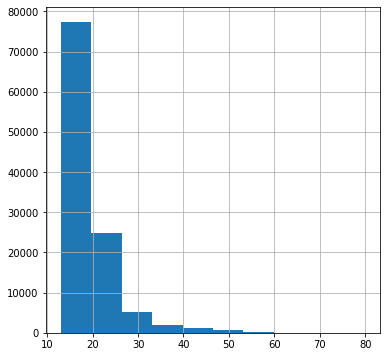

In [11]:
# Histogram of age distribution
stdnt_data['Age'].hist(figsize=(6,6))

> This visual shows that majority of students are around the age of 20 which agrees with our mean age of 20.38 years.

### 3. Verify Data Accuracy and Integrity
> Use of Group By to allow for quick overview of counts

In [12]:
# Grouping by admit status and enrolled status allows for counts and checking for inaccuracies;
# Students who are not admitted should not show as 'Enrolled'; 
Adm_Enrolled = stdnt_data.groupby(['Admit Status', 'Enrolled Status']).size()
Adm_Enrolled

Admit Status  Enrolled Status
Admitted      Enrolled           51151
              Not Enrolled       55255
Not Admitted  Not Enrolled        5209
dtype: int64

> Results show that we have indeed no enrollments for non-admits

In [13]:
# Ensuring no withdrawals for non-admits
Adm_Withdr = stdnt_data.groupby(['Admit Status', 'Withdrew?']).size()
Adm_Withdr

Admit Status  Withdrew?
Admitted      N            105536
              Y               870
Not Admitted  N              5209
dtype: int64

> Results show that we have no withdrawals for non-admits and a total of 870 withdrawals for previously admitted students

### We now have a dataset that no longer contains any null values. The validity of the data has been verified by looking at groupings and counts and we can proceed with further analysis. 

### 4. Exploratory Data Analysis

In [14]:
# Group by Status
status = stdnt_data.groupby('Status').size()
status

Status
Active                  61082
Admitted                26322
Application Deferred      552
Applied                  2646
Cancelled               20123
Denied                    819
Discontinued               71
dtype: int64

In [15]:
# Group by Admit Type
admit_type = stdnt_data.groupby('Admit Type').size()
admit_type

Admit Type
Freshman         67874
High School       1665
International    10300
Online            7127
Other               36
Readmit           6000
Transfer         18613
dtype: int64

In [16]:
# Group by Age
age = stdnt_data.groupby('Age').size()
age

Age
13       1
14      14
15     105
16     440
17    2639
      ... 
71       1
72       2
74       2
77       1
80       1
Length: 63, dtype: int64

In [17]:
# Group by Ethnicity for preliminary counts
eth = stdnt_data.groupby('Ethnicity').size()
eth

Ethnicity
African American              7277
Asian                         8709
Hawaiian Pacific Islander      162
Hispanic                     10558
Multi Racial                  4333
Native American                550
Not Specified                 2517
WHITE                            1
White                        77508
dtype: int64

In [18]:
# Group by College / Program
college = stdnt_data.groupby('College').size()
college

College
Agriculture                14085
Architecture                2740
Arts & Sciences            38949
Business Administration    14601
Education                   5632
Engineering                18290
Health & Human Sciences    12005
Technology & Aviation       5313
dtype: int64

In [19]:
# Group by Admit Term
term = stdnt_data.groupby('Admit Term').size()
term

Admit Term
Fall 2012      12556
Fall 2013      12714
Fall 2014      12671
Fall 2015      11680
Fall 2016      11382
Fall 2017      10368
Fall 2018      12233
Fall 2019      12037
Spring 2012      648
Spring 2013     2554
Spring 2014     2275
Spring 2015     2088
Spring 2016     1997
Spring 2017     1888
Spring 2018     2442
Spring 2019     2082
dtype: int64

In [20]:
# Dropping values that are insignificant in further analysis
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Admit Type'] == "High School"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Admit Type'] == "Other"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Age'] < 17].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Age'] > 60].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Ethnicity']== "WHITE"].index)
stdnt_data = stdnt_data.drop(stdnt_data[stdnt_data['Ethnicity']== "Not Specified"].index)
stdnt_data.head()

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
7,919451,MO,60,F,US,African American,OS,Fall 2019,Business Administration,Degree,Global Campus,Online,Cancelled,2019-06-08,Not Admitted,Not Enrolled,N
8,172358,TX,60,F,US,White,OS,Fall 2019,Agriculture,Degree,Global Campus,Online,Active,2019-04-16,Admitted,Not Enrolled,N
9,135435,KS,59,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Manhattan Main Campus,Readmit,Active,2018-09-18,Admitted,Not Enrolled,N
10,922350,KS,58,F,US,White,IS,Fall 2019,Arts & Sciences,Degree,Manhattan Main Campus,Transfer,Applied,2019-08-09,Not Admitted,Not Enrolled,N
11,916358,TX,58,M,US,White,OS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-04-30,Not Admitted,Not Enrolled,N


In [22]:
# Replacing categorical values with numerical values (adding new column for College: College2)
stdnt_data['Admit Status'] = stdnt_data['Admit Status'].map({'Admitted': 1, 'Not Admitted': 0})
stdnt_data['Enrolled Status'] = stdnt_data['Enrolled Status'].map({'Enrolled': 1, 'Not Enrolled': 0})
stdnt_data['Withdrew?'] = stdnt_data['Withdrew?'].map({'Y': 1, 'N': 0})
stdnt_data['Status'] = stdnt_data['Status'].map({'Active': 1, 'Admitted': 2, 'Application Deferred': 3, 'Applied': 4, 'Cancelled': 5, 'Denied': 6, 'Discontinued':7})
stdnt_data['Residency'] = stdnt_data['Residency'].map({'IS': 1, 'OS':2})
stdnt_data['Admit Type'] = stdnt_data['Admit Type'].map({'Freshman': 1, 'International': 2, 'Online': 3, 'Transfer': 4, 'Readmit': 5})
stdnt_data['Gender'] = stdnt_data['Gender'].map({'F': 1, 'M': 2})
stdnt_data['Degree / Non-Degree'] = stdnt_data['Degree / Non-Degree'].map({'Degree': 1, 'Non-Degree': 2})
stdnt_data['Ethnicity'] = stdnt_data['Ethnicity'].map({'Native American': 1, 'Hawaiian Pacific Islander': 2, 'Multi Racial': 3, 'African American': 4, 'Asian': 5, 'Hispanic': 6, 'White': 7})
stdnt_data['College2'] = stdnt_data['College'].map({'Architecture': 1, 'Technology & Aviation': 2, 'Education': 3, 'Health & Human Sciences': 4, 'Agriculture': 5, 'Business Administration': 6, 'Engineering': 7, 'Arts & Sciences': 8})
stdnt_data['Admit Term'] = stdnt_data['Admit Term'].map({'Fall 2012': 2012, 'Spring 2012': 2012, 'Fall 2013': 2013, 'Spring 2013': 2013, 'Fall 2014': 2014, 'Spring 2014': 2014, 'Fall 2015': 2015, 'Spring 2015': 2015, 'Fall 2016': 2016, 'Spring 2016': 2016, 'Fall 2017': 2017, 'Spring 2017': 2017, 'Fall 2018': 2018, 'Spring 2018': 2018, 'Fall 2019': 2019, 'Spring 2019': 2019})

##### Categorical - Numerical Equivalents:
Admit Status:
* Admitted - 1
* Not Admitted - 0

Enrolled Status:
* Enrolled - 1
* Not Enrolled - 2

Withdrew:
* Yes - 1
* No - 0

Status:
* Active - 1
* Admitted - 2
* Application Deferred - 3
* Applied - 4
* Cancelled - 5
* Denied - 6
* Discontinued - 7

Residency:
* IS - 1
* OS - 2

Admit Type:
* Freshman - 1
* International - 2
* Online - 3
* Transfer - 4
* Readmit - 5

Gender:
* Female - 1
* Male - 2

Ethnicity (by ascending counts):
* Native American - 1
* Hawaiian Pacific Islander - 2
* Multi Racial - 3
* African American - 4
* Asian - 5 
* Hispanic - 6
* White - 7

College:
* Architecture - 1
* Technology & Aviation - 2
* Education - 3
* Health & Human Sciences - 4
* Agriculture - 5
* Business Administration - 6
* Engineering - 7
* Arts & Sciences - 8

In [23]:
# Verifying replacement of categorical values
stdnt_data.head()

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?,College2
7,919451,MO,60,1,US,4,2,2019,Business Administration,1,Global Campus,3,5,2019-06-08,0,0,0,6
8,172358,TX,60,1,US,7,2,2019,Agriculture,1,Global Campus,3,1,2019-04-16,1,0,0,5
9,135435,KS,59,2,US,4,1,2019,Health & Human Sciences,1,Manhattan Main Campus,5,1,2018-09-18,1,0,0,4
10,922350,KS,58,1,US,7,1,2019,Arts & Sciences,1,Manhattan Main Campus,4,4,2019-08-09,0,0,0,8
11,916358,TX,58,2,US,7,2,2019,Health & Human Sciences,1,Global Campus,3,5,2019-04-30,0,0,0,4


In [24]:
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107319 entries, 7 to 111612
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   107319 non-null  int64         
 1   State                107319 non-null  object        
 2   Age                  107319 non-null  int64         
 3   Gender               107319 non-null  int64         
 4   Citizenship          107319 non-null  object        
 5   Ethnicity            107319 non-null  int64         
 6   Residency            107319 non-null  int64         
 7   Admit Term           107319 non-null  int64         
 8   College              107319 non-null  object        
 9   Degree / Non-Degree  107319 non-null  int64         
 10  Application Center   107319 non-null  object        
 11  Admit Type           107319 non-null  int64         
 12  Status               107319 non-null  int64         
 13  Application Da

### 4.a) Correlation Analysis

In [25]:
# For the purpose of this analysis, will remove ID column and save in new dataframe
stdnt_data2 = stdnt_data.drop(['ID'], axis=1).reset_index(drop=True)
stdnt_data2.head()

,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?,College2
0,MO,60,1,US,4,2,2019,Business Administration,1,Global Campus,3,5,2019-06-08,0,0,0,6
1,TX,60,1,US,7,2,2019,Agriculture,1,Global Campus,3,1,2019-04-16,1,0,0,5
2,KS,59,2,US,4,1,2019,Health & Human Sciences,1,Manhattan Main Campus,5,1,2018-09-18,1,0,0,4
3,KS,58,1,US,7,1,2019,Arts & Sciences,1,Manhattan Main Campus,4,4,2019-08-09,0,0,0,8
4,TX,58,2,US,7,2,2019,Health & Human Sciences,1,Global Campus,3,5,2019-04-30,0,0,0,4


In [26]:
# Correlation Table
stdnt_data2.corr()

,Age,Gender,Ethnicity,Residency,Admit Term,Degree / Non-Degree,Admit Type,Status,Admit Status,Enrolled Status,Withdrew?,College2
Age,1.000000,0.000018,-0.041263,0.102301,0.013519,0.342222,0.484503,-0.141816,-0.078053,0.067387,0.090765,-0.083816
Gender,0.000018,1.000000,-0.012263,-0.023927,-0.015053,-0.051637,0.031328,-0.033414,0.006977,0.026499,-0.000004,0.051385
Ethnicity,-0.041263,-0.012263,1.000000,-0.215775,-0.022617,-0.008793,-0.012811,-0.067856,0.118247,0.131670,-0.000732,-0.053569
Residency,0.102301,-0.023927,-0.215775,1.000000,0.037531,0.160340,-0.015801,0.152496,-0.113982,-0.259182,0.009156,-0.060594
Admit Term,0.013519,-0.015053,-0.022617,0.037531,1.000000,-0.006270,-0.016019,0.085836,-0.286549,-0.064561,0.016605,-0.065207
Degree / Non-Degree,0.342222,-0.051637,-0.008793,0.160340,-0.006270,1.000000,0.163643,-0.124955,0.025845,0.060974,0.064961,0.004221
Admit Type,0.484503,0.031328,-0.012811,-0.015801,-0.016019,0.163643,1.000000,-0.236926,-0.040483,0.180433,0.064959,-0.055637
Status,-0.141816,-0.033414,-0.067856,0.152496,0.085836,-0.124955,-0.236926,1.000000,-0.331095,-0.639739,-0.055717,0.010965
Admit Status,-0.078053,0.006977,0.118247,-0.113982,-0.286549,0.025845,-0.040483,-0.331095,1.000000,0.199734,0.019225,0.040106
Enrolled Status,0.067387,0.026499,0.131670,-0.259182,-0.064561,0.060974,0.180433,-0.639739,0.199734,1.000000,-0.071499,-0.033796


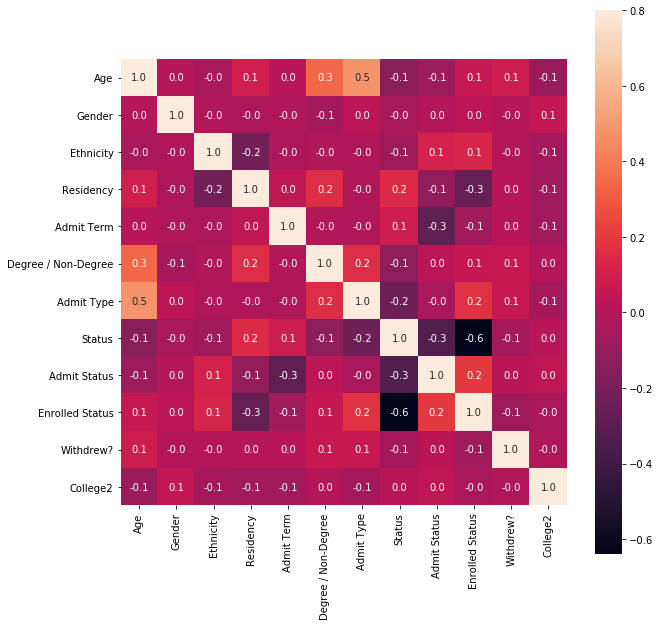

In [27]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(stdnt_data2.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

The above heatmap and correlation analysis shows us that Status and Residency have a positive correlation, as does Age and Admit Type. The latter indicates that as age increases so does the tendency for students to be either a Readmit or Transfer admit.  Residency and Enrolled Status however, have a negative correlation, as well as Status and Admit Type. 
I think at this time it would be useful to analyze by admit type. This will allow for a in-depth view of the various factors, and also reduce the skewdness of the data as it is predominantely Freshmen and under the age of 20. 

In [28]:
# Create Datasets for admit types Freshmen and all other admit types
FRS = stdnt_data2.drop(stdnt_data2[stdnt_data2['Admit Type']!= 1].index).reset_index(drop=True)
FRS = FRS.drop(FRS[FRS['Age']>=19].index).reset_index(drop=True)
AllOtherAdmits = stdnt_data2.drop(stdnt_data2[stdnt_data2['Admit Type']== 1].index).reset_index(drop=True)

In [29]:
FRS = FRS.drop(['State','Admit Term', 'College', 'Application Center', 'Application Date'], axis=1)
AllOtherAdmits = AllOtherAdmits.drop(['State','Admit Term', 'College', 'Application Center', 'Application Date'], axis=1)
FRS.head()

,Age,Gender,Citizenship,Ethnicity,Residency,Degree / Non-Degree,Admit Type,Status,Admit Status,Enrolled Status,Withdrew?,College2
0,18,1,US,7,1,1,1,1,1,1,0,8
1,18,1,US,3,1,1,1,5,1,0,0,8
2,18,1,US,7,2,1,1,1,1,1,0,5
3,18,2,US,4,1,1,1,1,1,1,0,7
4,18,2,US,7,1,1,1,1,1,1,0,5


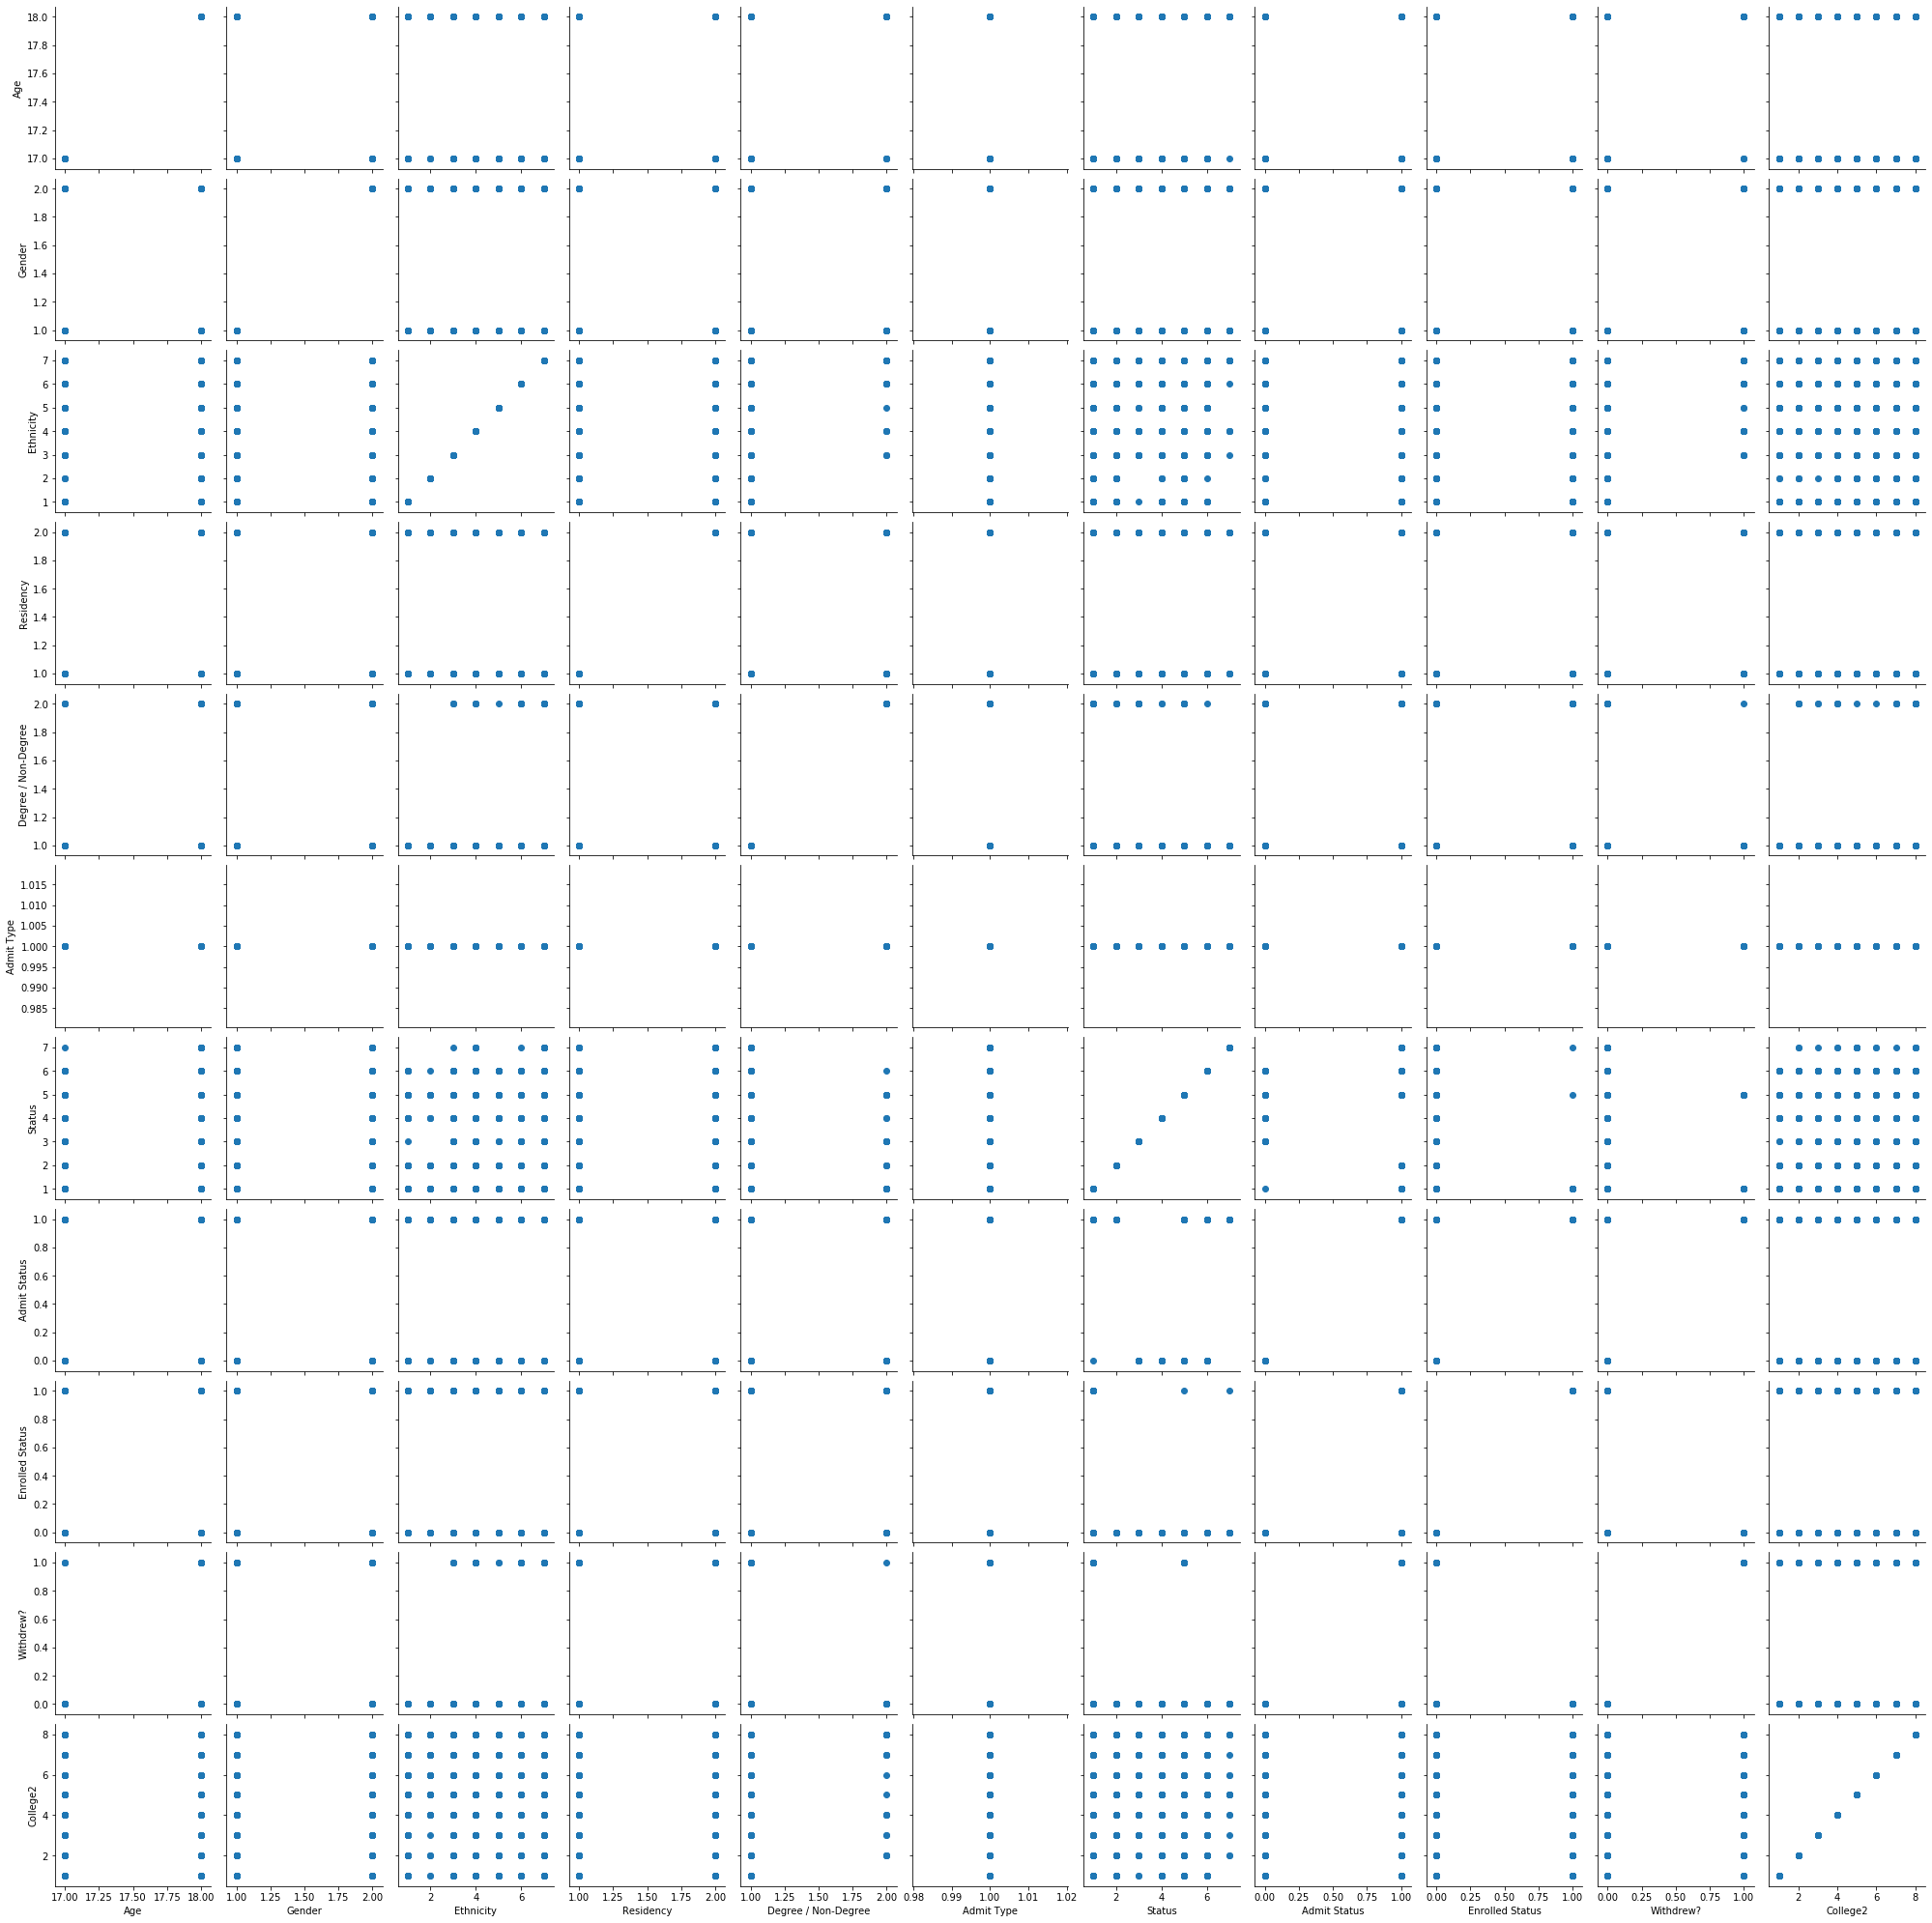

In [30]:
# Scatterplots 
g = sns.PairGrid(FRS)
g.map(plt.scatter)

We can now see that after reducing the data to Freshmen only and under the age of 19, the scatterplots don't yield to much information by a quick overview. 

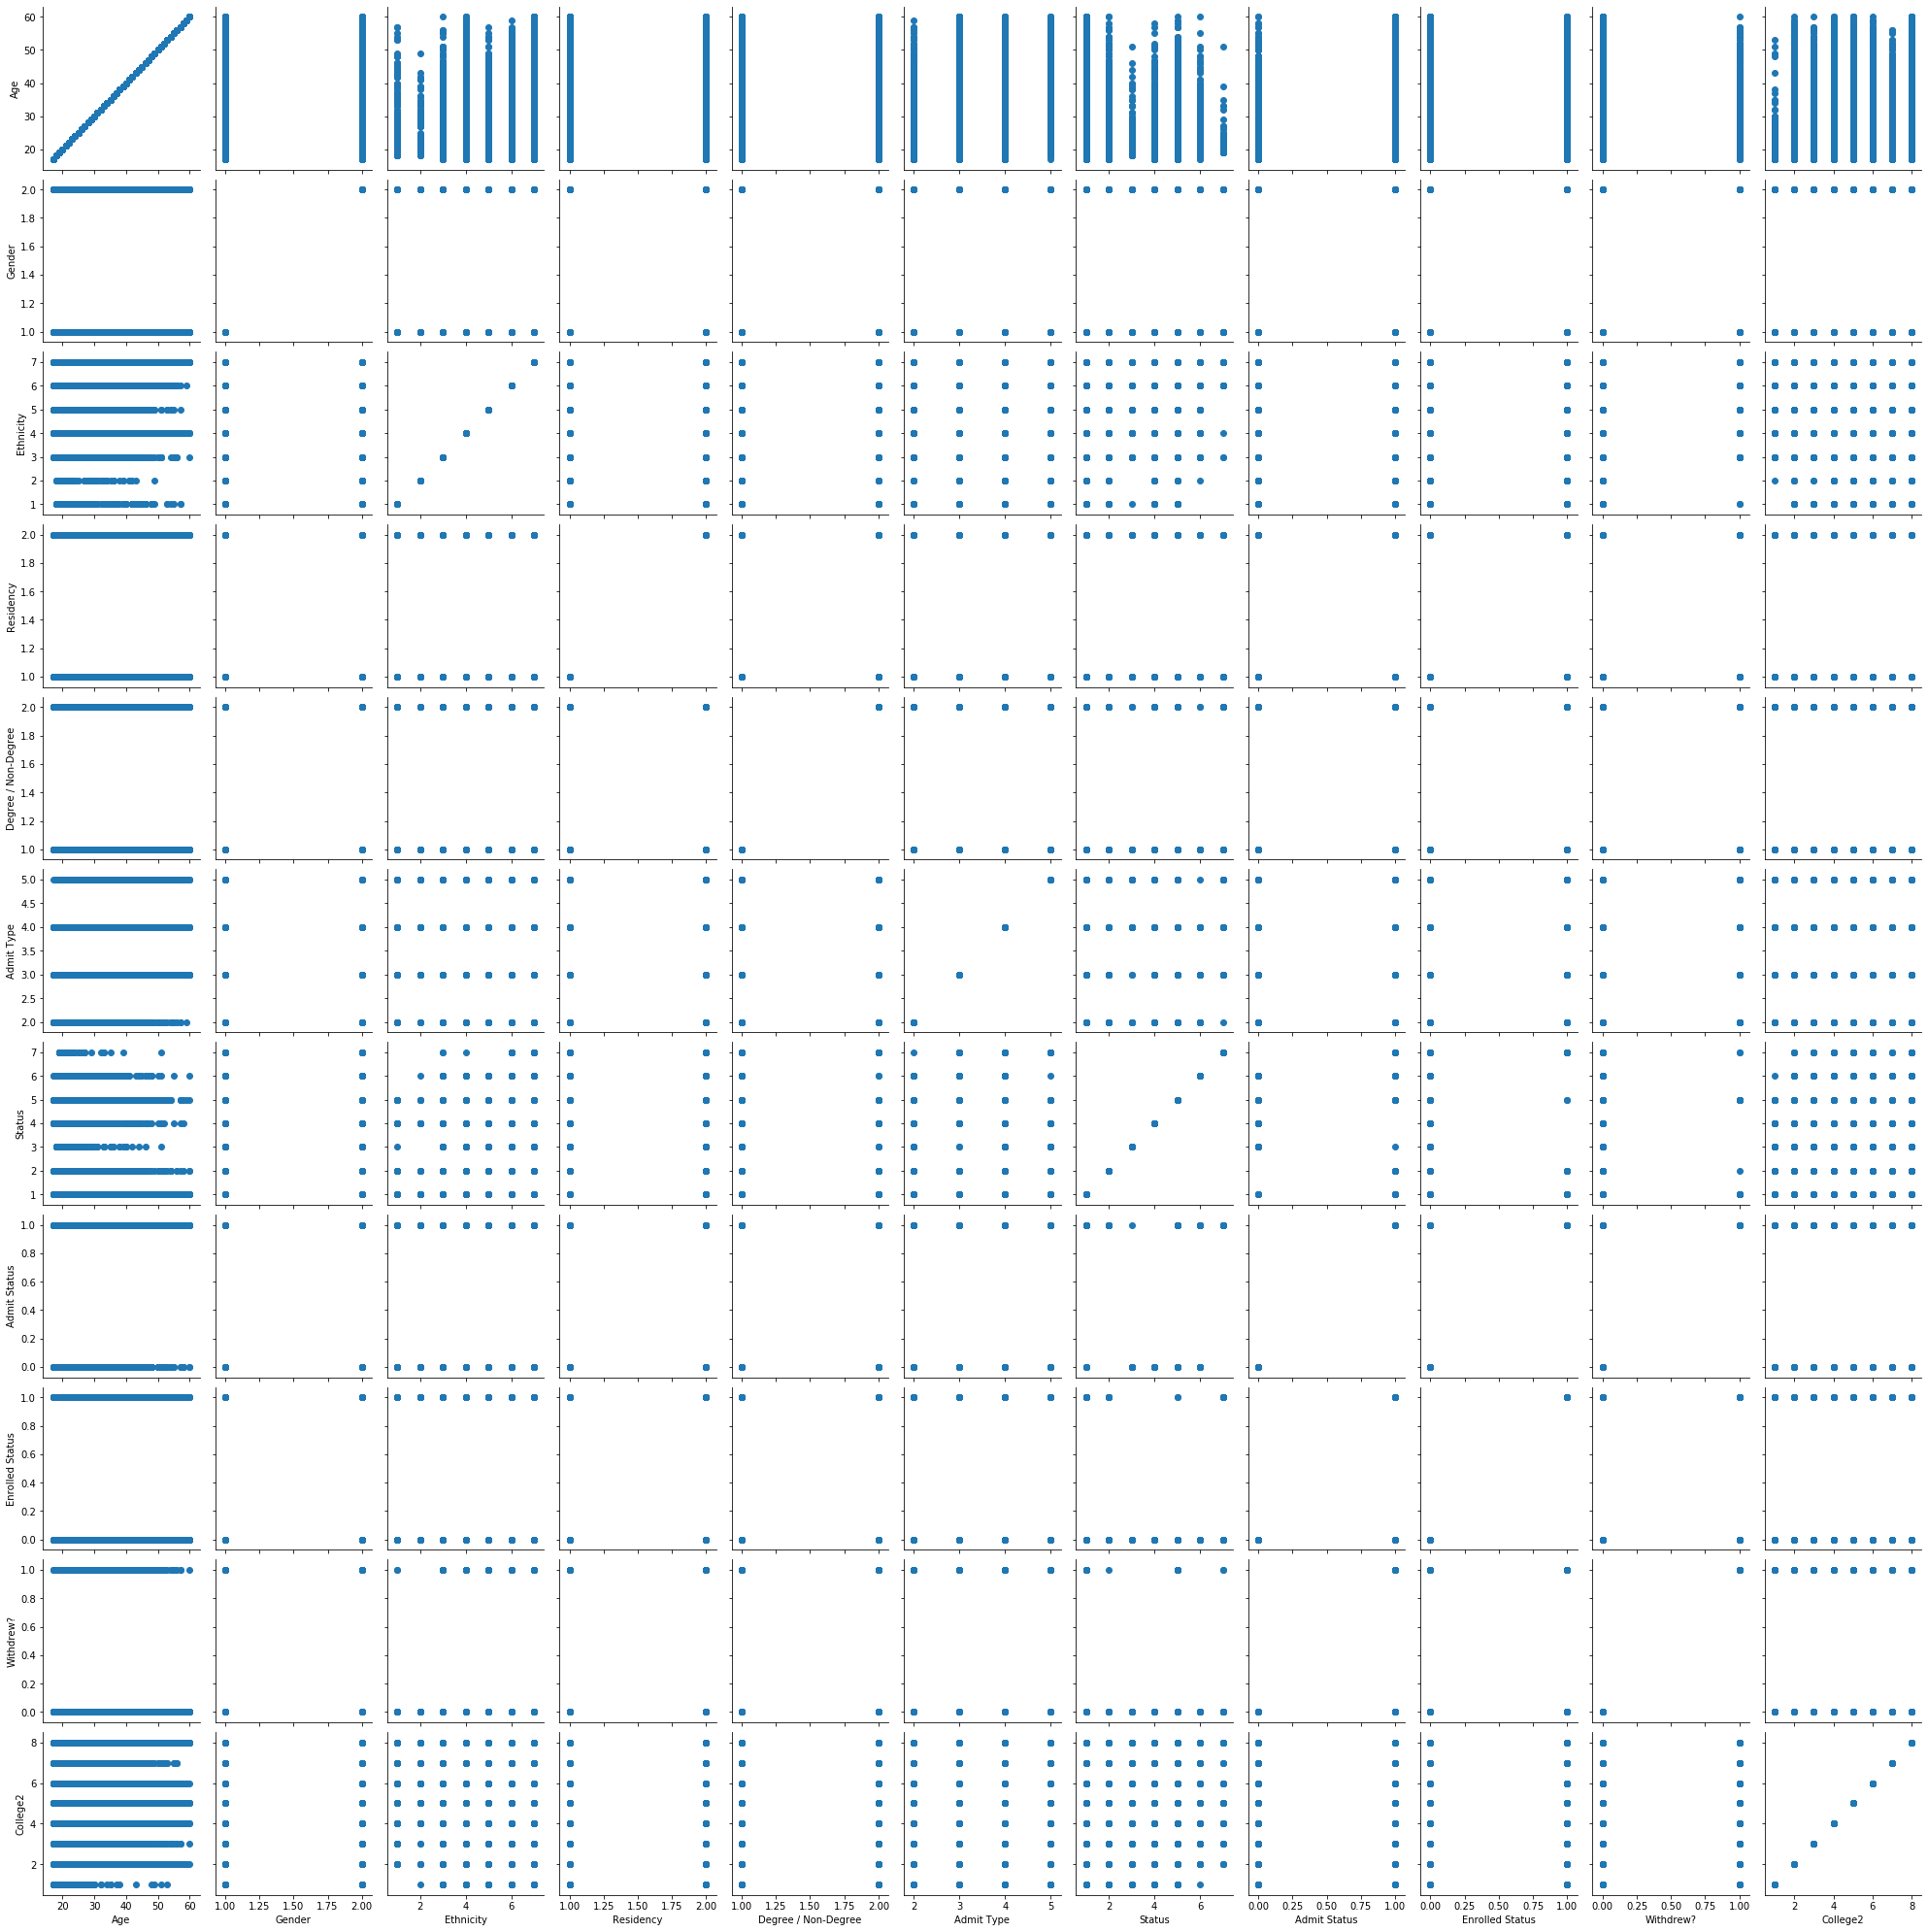

In [31]:
g2 = sns.PairGrid(AllOtherAdmits)
g2.map(plt.scatter)

### Taking a Closer Look - Correlation between two columns: 
#### Age & Ethnicity

In [32]:
# Age & Ethnicity for Freshmen
FRS[['Age', 'Ethnicity']].corr()

,Age,Ethnicity
Age,1.00000,0.07249
Ethnicity,0.07249,1.00000


In [33]:
# Age & Ethnicity for All other Admit Types
AllOtherAdmits[['Age', 'Ethnicity']].corr()

,Age,Ethnicity
Age,1.000000,0.047077
Ethnicity,0.047077,1.000000


For both datasets, we can see that age and ethnicity are positively correlated, however, for the freshmen data, they are by far more strongly positively correlated. 

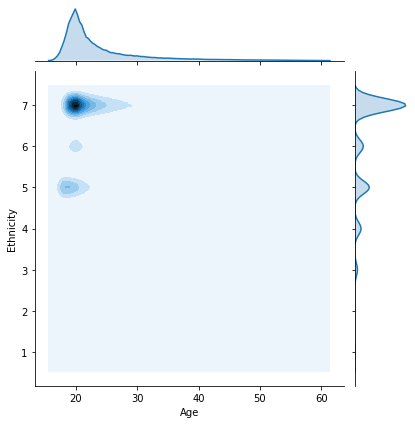

In [35]:
sns.jointplot(x="Age", y="Ethnicity", data=AllOtherAdmits, kind="kde")

#### College and Ethnicity

In [41]:
FRS[['College2', 'Ethnicity']].corr()

,College2,Ethnicity
College2,1.000000,-0.044402
Ethnicity,-0.044402,1.000000


In [42]:
AllOtherAdmits[['College2', 'Ethnicity']].corr()

,College2,Ethnicity
College2,1.000000,-0.086287
Ethnicity,-0.086287,1.000000


While both are negatively correlated, the factor increases for all other admit types. This may indicate that freshmen tend to be undecided, entering the 'open options' track for Arts & Sciences while other admit types, tend to already be focused on a given track and program by the time they are admitted into the university and the respective college. 

College2
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
8    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

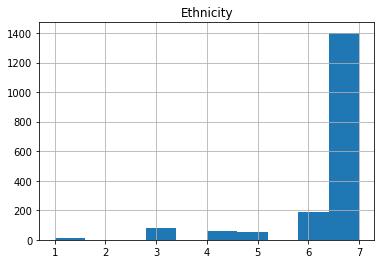

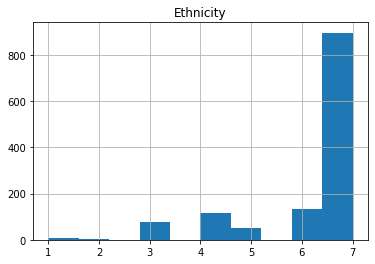

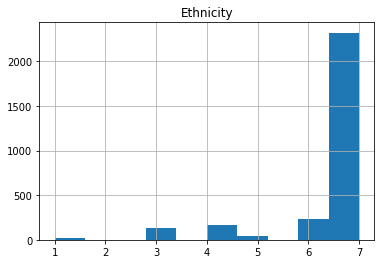

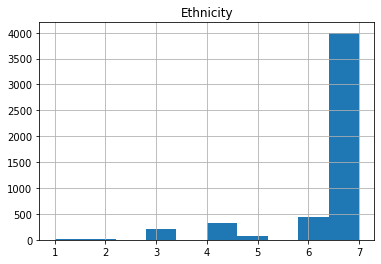

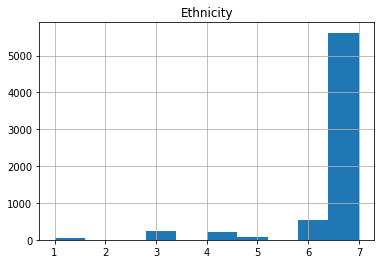

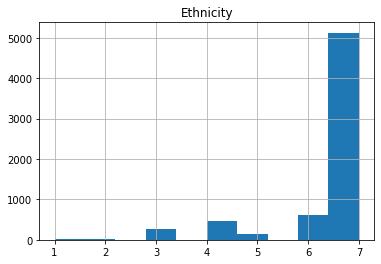

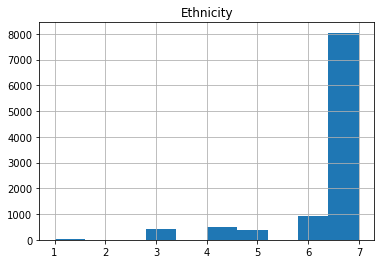

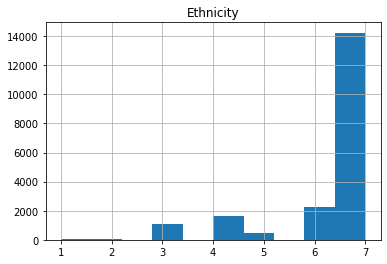

In [37]:
# Grouped distribution of ethnicity by College
FRS.groupby('College2').hist('Ethnicity')

College2
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
8    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

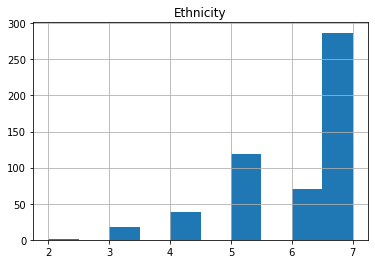

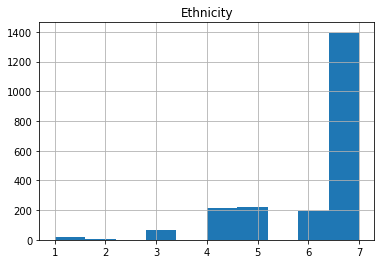

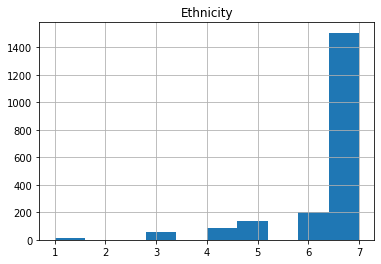

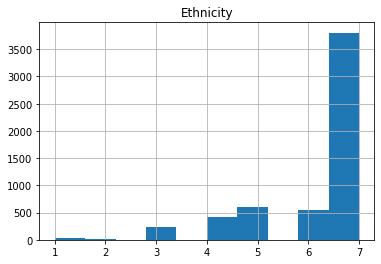

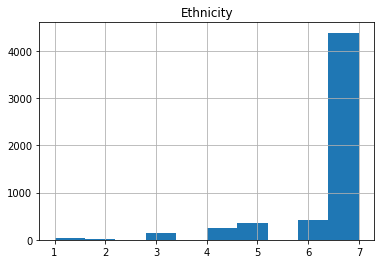

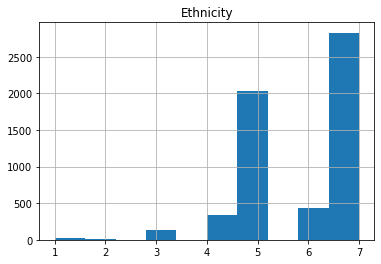

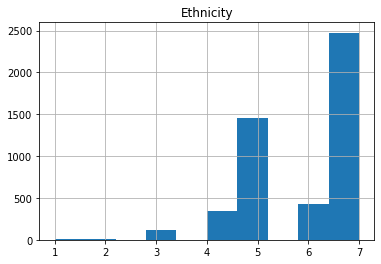

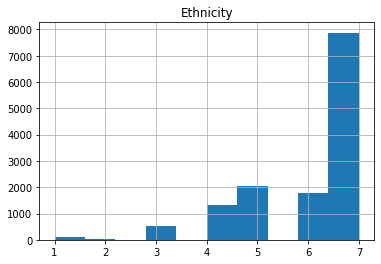

In [38]:
AllOtherAdmits.groupby('College2').hist('Ethnicity')

By taking a look at the grouped distribution it is obvious right away, that for traditional Freshmen, the students are predominantely white across all colleges. Once we look at the other admit types, the distribution, while still skewed towards white students, are now showing increases in other ethnicities for some of the colleges. Specifically, for the following colleges: Architecture (1), Business Administration (6), and Engineering (7).  

#### Gender and College / Ethnicity

In [40]:
gen = FRS.groupby('Gender').size()
gen

Gender
1    30172
2    24422
dtype: int64

In [44]:
gen2 = AllOtherAdmits.groupby('Gender').size()
gen2

Gender
1    19480
2    20770
dtype: int64

Interestingly, for Freshmen, there are more female studens while for all other admit types, we show more male students. 

In [45]:
FRS[['Gender', 'College2']].corr()

,Gender,College2
Gender,1.000000,0.045361
College2,0.045361,1.000000


In [46]:
AllOtherAdmits[['Gender', 'College2']].corr()

,Gender,College2
Gender,1.000000,0.075634
College2,0.075634,1.000000


Gender and College are both positively correlated, indicating that as we increase in the college code assigned, we tend to see more male students. This is likely due to Engineering and Business being in the highest 3 assigned numeric categories. 

In [47]:
FRS[['Gender', 'Ethnicity']].corr()

,Gender,Ethnicity
Gender,1.000000,0.004251
Ethnicity,0.004251,1.000000


In [48]:
AllOtherAdmits[['Gender', 'Ethnicity']].corr()

,Gender,Ethnicity
Gender,1.00000,-0.04287
Ethnicity,-0.04287,1.00000


The positive correlation between gender and ethnicity, indicates that it trends towards white, male students for Freshmen, while these two factors are negatively correlated for all other admit types indicating non-male, white, or non-white, male students in this group.

In [49]:
FRS[['Gender', 'Age']].corr()

,Gender,Age
Gender,1.000000,0.018314
Age,0.018314,1.000000


In [50]:
AllOtherAdmits[['Gender', 'Age']].corr()

,Gender,Age
Gender,1.000000,-0.064459
Age,-0.064459,1.000000


The prior correlation analysis of admit type and gender, could have led us to believe that there were more male students across the board, however, with the gender and age correlation analysis for all other admit types, we can see that this being negatively correlated, the older the student tends to be, the likelihood of the student being female, increases as well. Therefore, for admit types with a younger population, these would trend to be more male students vs. female. This is definitely something important and worth noting, as in that females are more likely to pause and resume (e.g. readmits) academic careers later in life than male students. 

#### Age and Admit Type (All Others)

In [43]:
AllOtherAdmits[['Age', 'Admit Type']].corr()

,Age,Admit Type
Age,1.000000,0.054473
Admit Type,0.054473,1.000000


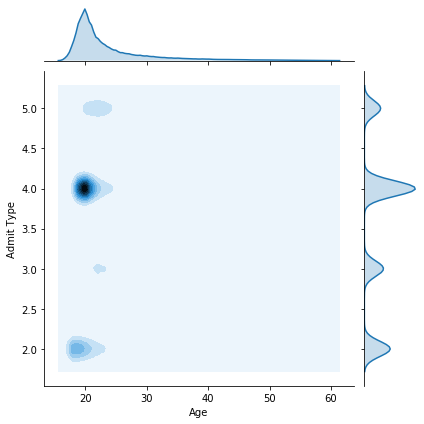

In [34]:
# Jointplot
sns.jointplot(x="Age", y="Admit Type", data=AllOtherAdmits, kind="kde")

When looking at the age distribution for all other admit types, we can see that transfer and international students also tend to be younger and more heavily represented within this population. This is going to be important when taking into account our earlier result of female students tending to be older for admit types other than freshmen. 

### 4.b) T-Test

In [80]:
female = FRS[FRS['Gender'] == 1]['Ethnicity']
male = FRS[FRS['Gender'] == 2]['Ethnicity']
stats.ttest_ind(female, male)

Ttest_indResult(statistic=-0.9932137270826883, pvalue=0.3206102122725786)

In [81]:
two_sample = stats.ttest_ind(female, male)
print ("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

The t-statistic is -0.993 and the p-value is 0.321.


In [84]:
female2 = AllOtherAdmits[AllOtherAdmits['Gender'] == 1]['Ethnicity']
male2 = AllOtherAdmits[AllOtherAdmits['Gender'] == 2]['Ethnicity']
stats.ttest_ind(female2, male2)

Ttest_indResult(statistic=8.608550212674903, pvalue=7.662471663707409e-18)

In [85]:
two_sample = stats.ttest_ind(female2, male2)
print ("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

The t-statistic is 8.609 and the p-value is 0.000.


The high p-value for the freshmen group indicates that there is no significant difference between the two groups in terms of ethnicity. For all other admit types, this is not the case and the low p-value indicates here that there is indeed a significatnt difference between the groups male / female and ethnicity. 

### 4.c) Boxplots and Variance

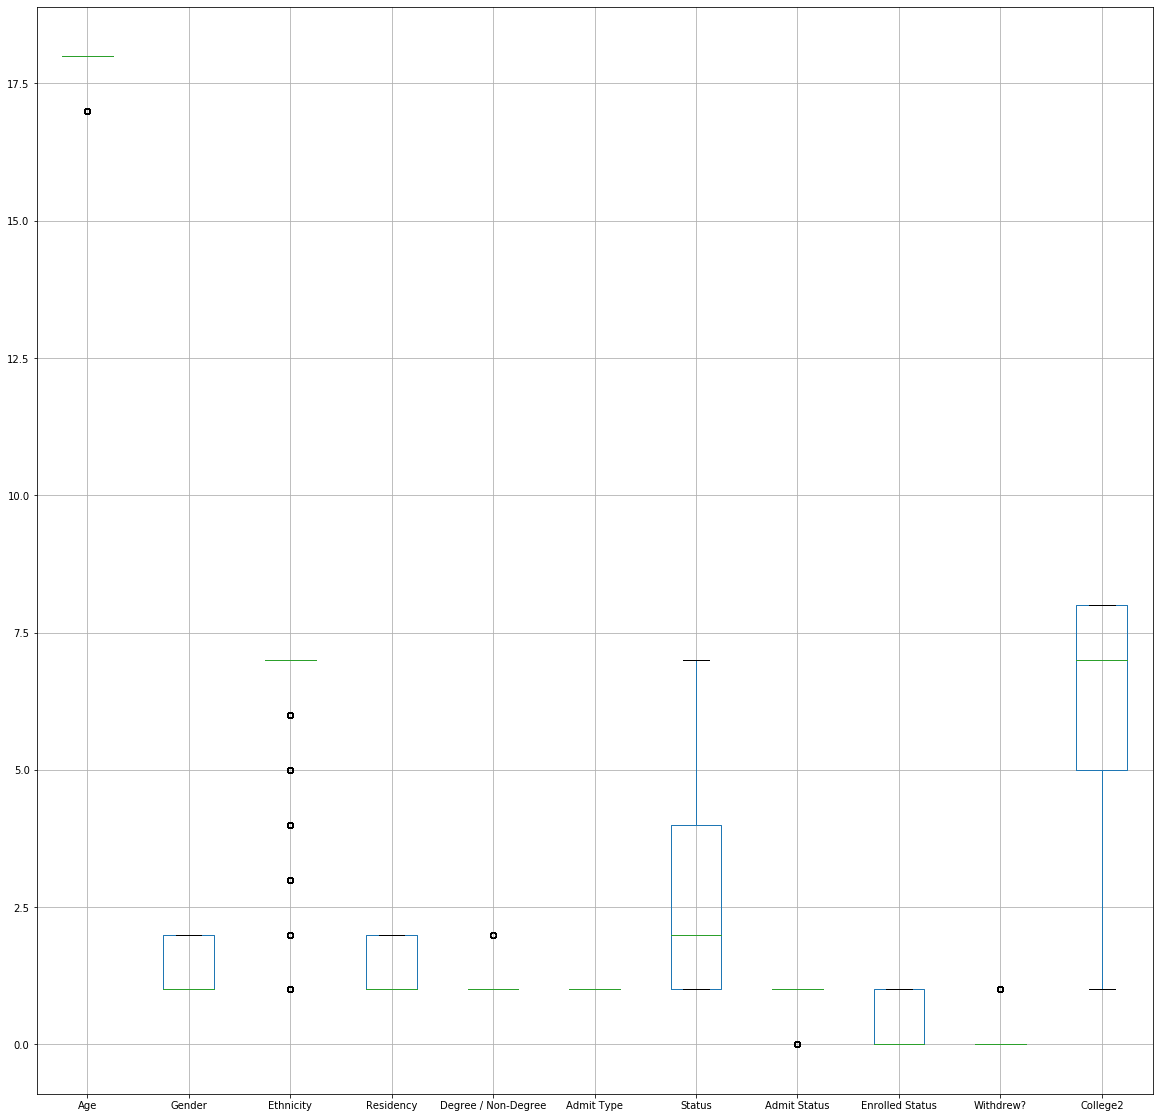

In [91]:
FRS.boxplot(figsize=(20,20))

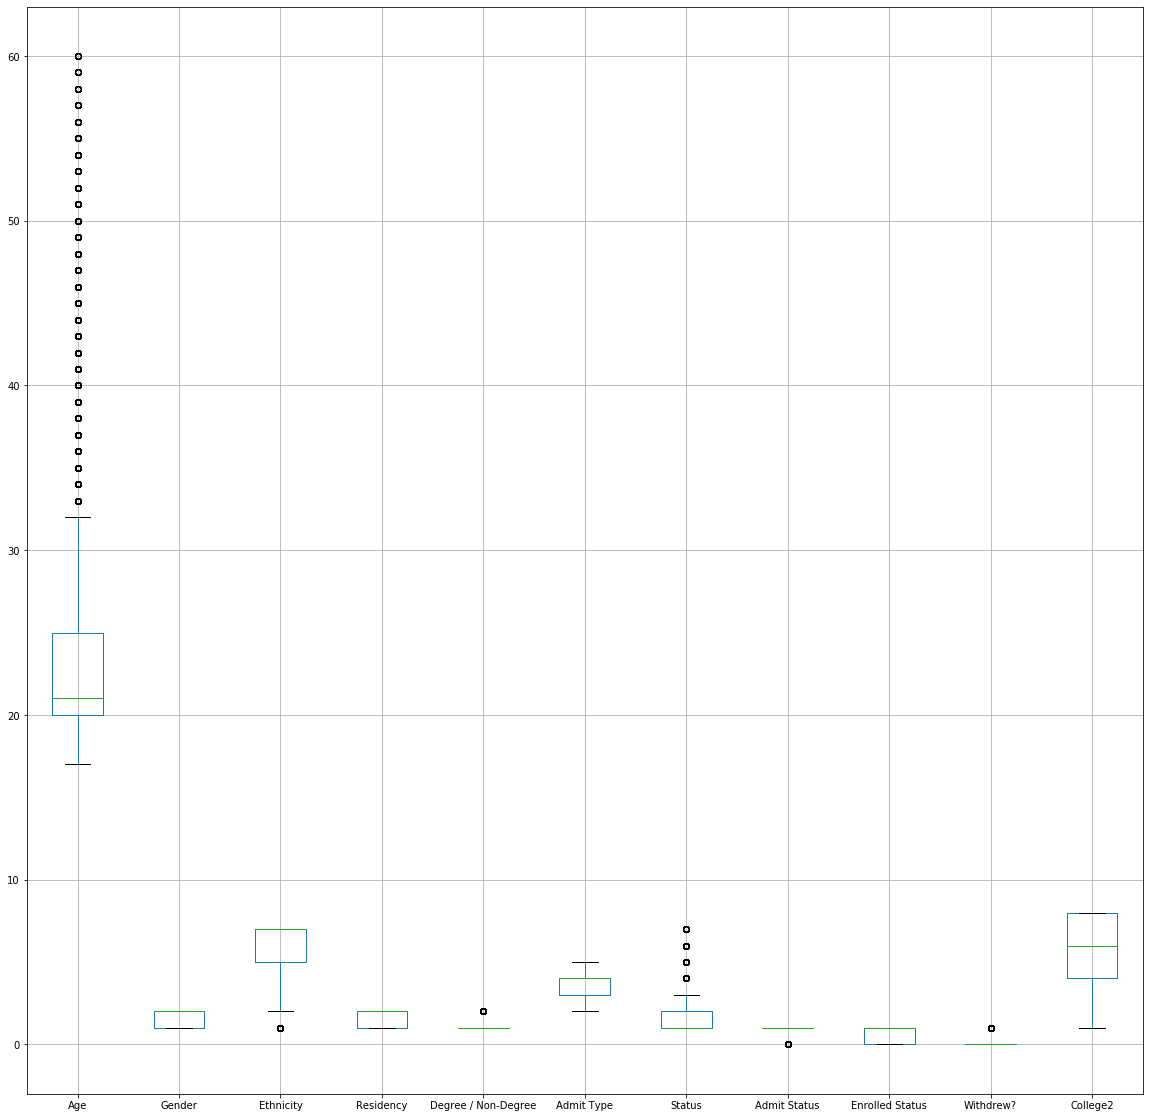

In [92]:
AllOtherAdmits.boxplot(figsize=(20,20))

In [89]:
FRS.var()

Age                    0.022547
Gender                 0.247231
Ethnicity              1.386818
Residency              0.225872
Degree / Non-Degree    0.000732
Admit Type             0.000000
Status                 2.697959
Admit Status           0.028173
Enrolled Status        0.240430
Withdrew?              0.002576
College2               3.780054
dtype: float64

In [93]:
AllOtherAdmits.var()

Age                    47.512395
Gender                  0.249749
Ethnicity               1.525348
Residency               0.249633
Degree / Non-Degree     0.114451
Admit Type              0.997680
Status                  1.720797
Admit Status            0.062669
Enrolled Status         0.248981
Withdrew?               0.014830
College2                3.798428
dtype: float64

This shows us that we certainly have greater variance in all other admit types when it comes to ethnicity, however, regarding status, freshmen show a greater variance. This indicates that freshmen may apply, but not follow through with admission, enrollment, etc. Furthermore, college variance is also greater among the all other admit type group. 